# Importing libraries and dataset

In [86]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Import dataset

coasters = pd.read_csv('Desktop/coaster_db.csv')

In [88]:
#Making sure it imported correctly

coasters.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


# 1. How many columns and rows are in the dataset?

In [89]:
# Column count

num_columns = len(coasters.columns)

print(num_columns)

56


In [90]:
# Row count

num_rows = len(coasters.index)

print(num_rows)

1087


# 2. Is there any missing data?

In [91]:
#Missing data

missing_data = coasters.isnull().sum()

print(missing_data)

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

# 3. Display the summary statistics of the numeric columns using the describe method.

In [92]:
#Summary stats

stats = coasters.describe()

print(stats)

       Inversions  year_introduced    latitude   longitude  speed1_value  \
count  932.000000      1087.000000  812.000000  812.000000    937.000000   
mean     1.547210      1994.986201   38.373484  -41.595373     53.850374   
std      2.114073        23.475248   15.516596   72.285227     23.385518   
min      0.000000      1884.000000  -48.261700 -123.035700      5.000000   
25%      0.000000      1989.000000   35.031050  -84.552200     40.000000   
50%      0.000000      2000.000000   40.289800  -76.653600     50.000000   
75%      3.000000      2010.000000   44.799600    2.778100     63.000000   
max     14.000000      2022.000000   63.230900  153.426500    240.000000   

        speed_mph  height_value   height_ft  Inversions_clean  Gforce_clean  
count  937.000000    965.000000  171.000000       1087.000000    362.000000  
mean    48.617289     89.575171  101.996491          1.326587      3.824006  
std     16.678031    136.246444   67.329092          2.030854      0.989998  
min

# 4. Rename the following columns:
coaster_name ➡️ Coaster_Name,
year_introduced ➡️ Year_Introduced,
opening_date_clean ➡️ Opening_Date,
speed_mph ➡️ Speed_mph,
height_ft ➡️ Height_ft,
Inversions_clean ➡️ Inversions,
Gforce_clean ➡️ Gforce

In [93]:
# Renaming columns

new_names = {'coaster_name' : 'Coaster_Name',
            'year_introduced' : 'Year_Introduced',
            'opening_date_clean' : 'Opening_Date',
            'speed_mph' : 'Speed_mph',
            'height_ft' : 'Height_ft',
            'Inversions_clean' : 'Inversions',
            'Gforce_clean' : 'Gforce'}

coasters = coasters.rename(columns=new_names)

print(coasters.columns)

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed1', 'speed2', 'speed1_value', 'speed1_unit', 'Speed_mph',
       'height_value', 'height_unit', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')


# 5. Are there any duplicated rows?

In [94]:
#Finding duplicates

duplicated = coasters.duplicated().iloc[0:1087]

if duplicated.any():
    print("There are duplicates.")
else:
    print("There are no duplicates.")

There are no duplicates.


# 6. What are the top 3 years with the most roller coasters introduced?

In [95]:
# Grouping the dataset by year and counting the number of coasters introduced in each year

counts = coasters.groupby('Year_Introduced')['Coaster_Name'].count()

# Finding the top 3 from above

top_3 = counts.sort_values(ascending=False).head(3)

print(top_3)

Year_Introduced
1999    49
2000    47
1998    32
Name: Coaster_Name, dtype: int64


# 7. What is the average speed? Also display a plot to show it’s distribution.

In [96]:
# Calculating the average speed

avg_speed = coasters['Speed_mph'].mean()

print(avg_speed)

48.617289220917804


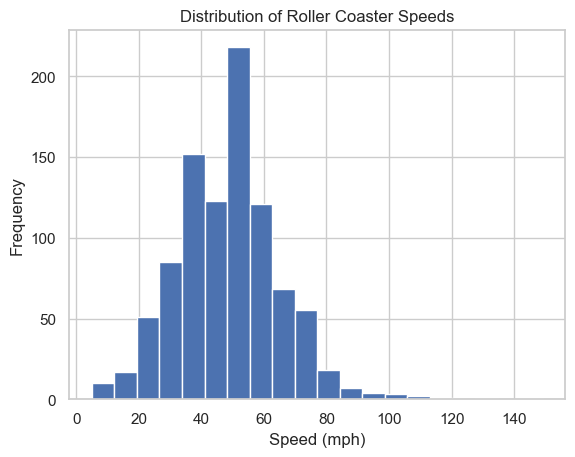

In [97]:
# Histogram of distribution

plt.hist(coasters['Speed_mph'], bins=20)
plt.title("Distribution of Roller Coaster Speeds")
plt.xlabel("Speed (mph)")
plt.ylabel("Frequency")
plt.show()

# 8. Explore the feature relationships. Are there any positively or negatively correlated relationships?

In [98]:
# Calculating the correlation coefficients between columns

correlations = coasters.corr()

print(correlations)

                 Inversions  Year_Introduced  latitude  longitude  \
Inversions         1.000000         0.211003 -0.009815   0.061589   
Year_Introduced    0.211003         1.000000 -0.070982   0.175913   
latitude          -0.009815        -0.070982  1.000000  -0.298488   
longitude          0.061589         0.175913 -0.298488   1.000000   
speed1_value       0.163419         0.210191 -0.121847   0.301179   
Speed_mph          0.252209         0.204853 -0.063757   0.051063   
height_value       0.094811         0.087687 -0.004265  -0.092764   
Height_ft          0.171330         0.232150  0.011492   0.159733   
Inversions         1.000000         0.228758 -0.014043   0.087160   
Gforce             0.356865        -0.066657  0.042871   0.016485   

                 speed1_value  Speed_mph  height_value  Height_ft  Inversions  \
Inversions           0.163419   0.252209      0.094811   0.171330    1.000000   
Year_Introduced      0.210191   0.204853      0.087687   0.232150    0.228758 

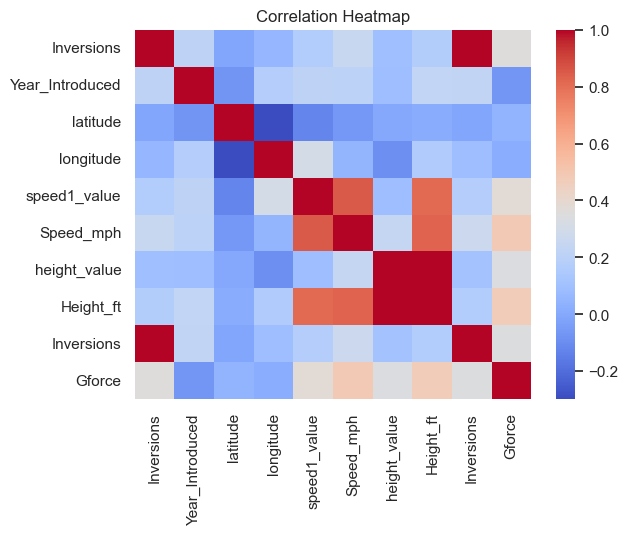

In [99]:
# Graphing the correlations

sns.heatmap(correlations, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 9. Create your own question and answer it. What are the top 5 locations with the most coasters and create a graph. 

In [100]:
#Grouping by location and number of coasters
coasters_by_location = coasters.groupby('Location').size().reset_index(name='count')

#Finding top 6 from above
top_6_locations = coasters_by_location.sort_values('count', ascending=False).head(6)

# Remove a specific value, I saw other was number one and wanted to remove this
top_6_locations = top_6_locations.drop(top_6_locations[top_6_locations['Location'] == 'Other'].index)

print(top_6_locations)

                      Location  count
38                 Cedar Point     19
132               Kings Island     19
225   Six Flags Magic Mountain     17
115                Hersheypark     16
223  Six Flags Great Adventure     15


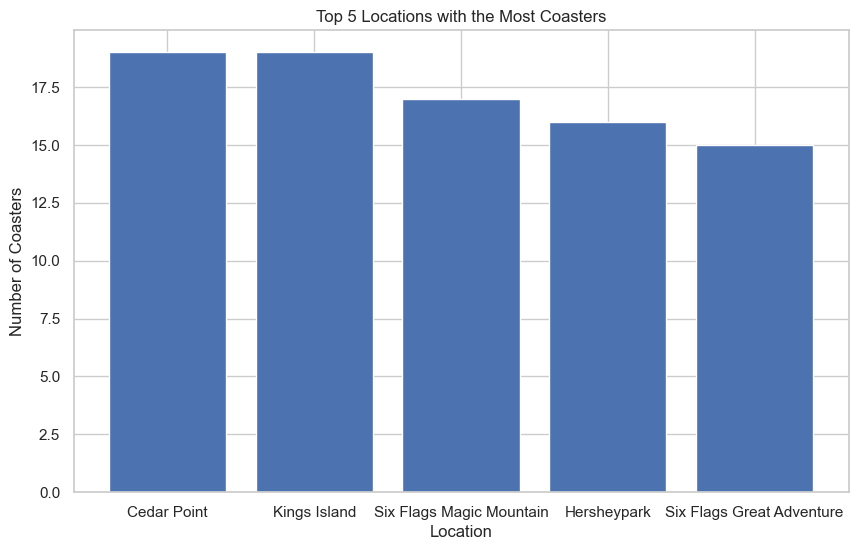

In [85]:
#Creating a graph

plt.figure(figsize=(10, 6))
plt.bar(top_6_locations['Location'], top_6_locations['count'])
plt.title('Top 5 Locations with the Most Coasters')
plt.xlabel('Location')
plt.ylabel('Number of Coasters')
plt.show()